## 4. Regression: Optimization of Long-Term Correction of Wind Data Using Regression Models

**Assignment Description**

In this assignment, you will work with realistic data from the wind industry. Vestas, a leading global company in wind energy, is interested in optimizing their methods for generating long-term corrected (LTC) wind data, which are used for planning the locations of new wind farms.

**Context**

Before building a new wind farm, Vestas needs to get an estimate of how much power it can produce. This can be done by running a simulation of the planned wind farm. The primary factors that decide how much power will be produced are: 

-  the turbine type (bigger turbines generally produce more energy), 

- the locations of the turbines (more energy is produced if the turbines are placed so that they do not block each other significantly) and 

- the wind speed and wind direction at the location where the wind farm is planned to be build. 

The turbine type and location is something that Vestas engineers get to decide, but wind is not so easily managed... Therefore, it is important to have a large amount of data to get a precise description of the distribution of wind speeds and wind directions at the potential site. Ideally a wind measuring mast would be build at the place of interest and collect data on wind speeds and wind directions for 20 years or so prior to the wind farm being build. However, the investers would probably become impatient if they had to wait for 20 years before construction could begin. 

So instead, a mast is build that collects data for a few years (typically 1-4 years). To account for more "global" variations in wind from year to year (some years are simply more windy than other years), the data from the mast is then compared to the data based on wind models which covers a much longer time scale. This model data (referred to as "meso" data) can be obtained for any location on Earth, and accounts for large scale wind variations (e.g. due to seasons, geography, Coriolis effect etc.). But it cannot be expected to give a precise description of the wind at a specific location, which is also affected by vegetation, buildings, the local landscape and so on. So in summary, the mast data captures the specific wind conditions for the given site, and the meso data accounts for variations in wind speeds on a longer time scale. Together, the two datasets usually give a good description of the wind at a specific site over a long time period, and therefore can be used to predict the expected power production over a long time span (e.g. 20 years, comparable to the life time of a wind farm).

Below is an illustration comparing a meso and a mast time series. Note that this plot is only for illustration purposes. In reality, meso data typically has a frequency of 1 hour, and mast data has a frequency of 10 minutes. Besides, the figure only illustrates the variations in windspeeds. For the actual simulations, wind directions are also extremely important (e.g. to determine the locations of the turbines such that they don't block each other for the prevalent wind directions).

![Illustration of meso vs mast time series](timeseries_example.png)

In order to run a simulation for a given (potential) site, Vestas needs to obtain a single time series which has the same characteristics as the mast timeseries, but has a time span of 20 years like the meso time series. For this purpose, they currently use a neural network: They train the network on the overlapping parts of the mast and meso time series. Specifically, they train the network to be able to predict the mast wind speeds and wind directions based on the wind speeds and wind directions found in the meso data for the same time stamps. After the neural network has been trained, they feed the meso wind speeds and wind directions for the entire 20 years time span to get a *predicted* "mast" time series covering the 20 years of data found in the meso data. This *predicted* mast time series is called the "long term corrected" (LTC) time series, and is the one on which they base their simulations for the power production at the given site. 

However, traning neural networks is time consuming and expensive! Therefore, Vestas is curious if some kind of linear regression would be able to acheive comparable results. 

**Data**
 
You will have access to two types of time series data:

1) Mast time series data that represent the wind conditions at a specific location based on measurements from a wind measuring mast.

2) Meso time series data that are based on weather measurement models and cover more than 20 years. While these data are less precise and don't exactly match the specific location, they provide a longer historical context.

Note that the mast data for this project is significantly longer than "typical" mast data. This allows cutting the data into training and test sets (or training, validation and test sets). Each set should cover all four seasons.

Your task is to develop a model using regression techniques that can generate LTC wind data. This LTC time series should be long, like the meso time series, but also give an accurate description of the wind conditions at the specific location.

**Objectives and Purpose**
 
The purpose of the assignment is to assess whether regression could be used instead of neural networks, which could potentially save time and money as it is generally quicker to perform a regression than to train a neural network. And the main objective is thus to develop a regression model that can generate LTC time series that are both accurate and cost-effective.

**Requirements**

Please note. We have supplied some examples of how students have previously done the preprocessing to give you some input and thus make the work load a bit less. Feel free to use/reuse the preprocessing steps of these solutions.

1. **Data preprocessing:** You must handle large datasets and perform necessary data preprocessing tasks. This includes dealing with missing values, handling outliers, and scaling data appropriately for the chosen regression technique. Feel free to use or get inspired by previous solutions.

    a. Consider the appropriate intervals for wind speeds and wind directions. No negative wind speeds are allowed, and wind directions should be in an appropriate interval (e.g. [0; 360[ degrees).

    b. Select which ws / wd signals to use. Signals at higher altitude are generally better, but it is even more important to have proper coverage of all seasons.

    c. Find the meso-signals closest in height to the mast-data-signal you are using. Or interpolate the values between 2 or more meso-signals to get the values at the exact mast-signal-height.

    d. Convert the mast data from DK time to UTC time (corresponding to the time zone used in the meso data). Remember to account for summer-time in DK.
    
    e. Resample the mast dataset to have the same frequency as the meso data. The meso data has one record for each hour, the mast data has one record for each 10 min.

        i. Note: You should not convert the ws / wd signals to vector-quantities and use those for the resampling. Resample the ws and wd signal individually instead. The turbines “yaw” to always point toward the incoming wind, so the interesting value is the wind speed and not the wind velocity.  
        ii. Be careful when resampling the wind directions. You don’t want the average of 0 degrees and 359 degrees to become ~180 degrees :-)

    f. Find the overlapping timestamps between the meso data and the resampled mast data. You only want to consider data in this overlapping time period in your training.

2. **Optional: Exploratory analysis:** You may do an exploratory analysis of the data, but this part is not mandatory. This includes presenting the data in tables and graphs, study and describe features of interest, as well as correlation analysis. Wind speeds typically follow a Weibull-distributions. Try fitting a Weibull distribution to the mast data, the resampled mast data and the meso-data. **(You can skip this part if you want to)**
3. **Model Development:** Use appropriate machine learning principles and methodologies, including model training and testing and perhaps validation, cross-validation, and leave-one-out. You should apply and interpret regression models effectively for this task.
4. **Model Evaluation:** Evaluate the developed model using appropriate metrics such as Mean Squared Error (MSE), R-squared (R²), etc. The evaluation should give an indication of the usefulness of your model in predicting wind conditions accurately. 
**Optional**: If you did step 2 above, in addition to calculating the above metric for your predicted time series, also consider comparing the distributions of the wind speeds in the predicted and the actual (resampled) mast data. That is, calculate the Weibull A- and k-parameters for both distributions, and find the error in these between your fit and the true data. "Error-in-A" and "Error-in-k" are the most used quantities to evaluate the long term correction process in the wind industry :-)
5. **Documentation and Presentation:** Clearly document the steps, methodologies, and tools you used during the process. Present the results of your model in a clear and effective manner. This documentation should be comprehensive enough for someone to replicate your process and understand your results. Hand-in as one Jupyter Notebook.


**Some additional comments**

They (Vestas) have also tried running their own LTC algorithm on some of the data (they chose the 77m wind speed and wind direction signals from the Risø dataset), and this yielded good results. They assumed that the data was in Danish time, so they believe that is the case.

As you can see, there is quite a focus on wind speeds (as they determine the amount of power produced). However, they know that their neural network operates by training on the different components of wind speed separately (meaning training one network on the x-component of the wind and another network on the y-component of the wind) and then combining them at the end. You may consider this method too. They are not sure if it yields better performance than training on wind speed and wind direction separately...but if time permits, give it a go.

**About the data**

The mast datasets are in netCDF format. It's quite easy to work with in Python (not sure if you've used it before?). In one of the folders, a test.py file is included that demonstrate how to load the dataset and access the most relevant mast signals.

The mast data has a measurement frequency of 10 minutes, while the meso data has a frequency of 1 hour. Therefore, you will need to resample the mast data to a 1-hour frequency before you can use it (see requirement 1.e above). Vestas does the same with their data. As mentioned you should be careful when resampling the angles so that the average of 0 degrees (north) and 359 degrees doesn't end up being approximately 180 degrees.

The data is publicly available. You can read more about it here:

*Risø:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/risoe_m.md

Data: https://data.dtu.dk/articles/dataset/Wind_resource_data_from_the_tall_Ris_met_mast/14153204 (this is the "DOI"-link from the description)


*Børglum:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/borglum.md

Data: https://data.dtu.dk/articles/dataset/Resource_data_from_the_Borglum_mast/14153231

The two meso datasets come from Vestas' climate library, and the meso data is in UTC time. They don't think you need anything other than the "wind speed" (WSP) and "wind direction" (WDIR) signals. They believe it's most appropriate to either use the height closest to the mast height (for example, if you're using the wind speed signal ws125 and the wind direction signal wd125 from the Risø dataset, you should use WSP120 and WDIR120 from the meso dataset) or use multiple signals and interpolate to the desired height (125m) (see the requirements above).

**Final comments**

In a perfect world, you can do all of the above. The assignment is "free" in the sense that you should give the above a go and do your best. Remember, there is no right answer. This assignment is a real-world machine learning task and not a "made-up" school task. There are software engineers at Vestas working on exactly the same task (albeit with a different dataset, which they arent' allowed to share with us). But try to discuss the problem in your group and distribute the work among you. You can even collaborate with other groups or find inspiration in their approach.

And remember. These portfolio assignments are not meant as "learn stuff in class and apply to assignment" - they are part of the learning process, and not simply a documentation of what you have learned. They should be seen as "learning by doing"-type assignments.

In session 8, we will do a Q/A if you have any questions. But as mentioned, try to give it a go. 

In [553]:
import netCDF4 as nc
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [554]:
file_path_risoe = 'Data/Risoe/risoe_m_all.nc'
ds = xr.open_dataset(file_path_risoe)
df = ds.to_dataframe()

df.head()


,ws44,ws44_qc,ws77,ws77_qc,ws125,ws125_qc,wd77,wd77_qc,wd125,wd125_qc,t003,t003_qc,t044,t044_qc,t118,t118_qc,td01,td01_qc,rain,rain_qc,press,press_qc,rhum,rhum_qc,grad,grad_qc
time,,,,,,,,,,,,,,,,,,,,,,,,,,
1995-11-20 16:25:00,NaN,NaN,3.36,0.0,3.04,0.0,205.0,0.0,208.0,0.0,-0.8,0.0,NaN,NaN,0.5,0.0,75.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1995-11-20 16:35:00,NaN,NaN,3.05,0.0,3.17,0.0,205.0,0.0,214.0,0.0,-0.7,0.0,NaN,NaN,0.4,0.0,74.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1995-11-20 16:45:00,NaN,NaN,3.59,0.0,3.64,0.0,204.0,0.0,209.0,0.0,-1.0,0.0,NaN,NaN,0.6,0.0,74.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1995-11-20 16:55:00,NaN,NaN,3.87,0.0,3.77,0.0,202.0,0.0,209.0,0.0,-1.3,0.0,NaN,NaN,0.8,0.0,74.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1995-11-20 17:05:00,NaN,NaN,4.74,0.0,4.28,0.0,201.0,0.0,212.0,0.0,-1.2,0.0,NaN,NaN,0.6,0.0,75.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


Let's see what features have the most missing values.

In [555]:
#Let's drop all qc columns as they are either all nan or 0.
drop_cols = [feat for feat in df.columns if 'qc' in feat]
df = df.drop(drop_cols, axis=1)

In [556]:
display(df.isna().mean())

ws44     0.234804
ws77     0.010745
ws125    0.137905
wd77     0.000872
wd125    0.110652
t003     0.000371
t044     0.040168
t118     0.415711
td01     0.038074
rain     0.000010
press    0.421577
rhum     0.418253
grad     0.507614
dtype: float64

As we can see there's a few that has over 40% of missing values. Let's remove those cause we can't reliably impute those with mean/mode. Maybe we would be able to do that with more domain knowledge.

In [557]:
drop_cols = [feat for feat in df.columns if df[feat].isna().mean() > 0.4]

print(f'Columns to drop: {drop_cols}')

Columns to drop: ['t118', 'press', 'rhum', 'grad']


In [558]:
df = df.drop(drop_cols, axis=1)

Let's handle the rest of the misssing values by imputing them.

In [559]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
for col in df.columns:
    print(col)
    df[col] = imp.fit_transform(df[col].values.reshape(-1,1))[:,0]

ws44
ws77
ws125
wd77
wd125
t003
t044
td01
rain


Let's see a correllation matrix

,ws44,ws77,ws125,wd77,wd125,t003,t044,td01,rain
ws44,1.000000,0.835060,0.693741,0.088325,0.068890,-0.008628,-0.021096,-0.003745,0.033360
ws77,0.835060,1.000000,0.878297,0.080986,0.071390,-0.047136,-0.060757,-0.028643,0.000634
ws125,0.693741,0.878297,1.000000,0.026188,0.045737,-0.057171,-0.064340,-0.020713,-0.005560
wd77,0.088325,0.080986,0.026188,1.000000,0.754374,0.204655,0.106377,-0.010675,-0.352786
wd125,0.068890,0.071390,0.045737,0.754374,1.000000,0.139302,0.037436,0.023936,-0.373501
t003,-0.008628,-0.047136,-0.057171,0.204655,0.139302,1.000000,0.962321,-0.075956,-0.208197
t044,-0.021096,-0.060757,-0.064340,0.106377,0.037436,0.962321,1.000000,-0.071141,0.002763
td01,-0.003745,-0.028643,-0.020713,-0.010675,0.023936,-0.075956,-0.071141,1.000000,0.010492
rain,0.033360,0.000634,-0.005560,-0.352786,-0.373501,-0.208197,0.002763,0.010492,1.000000


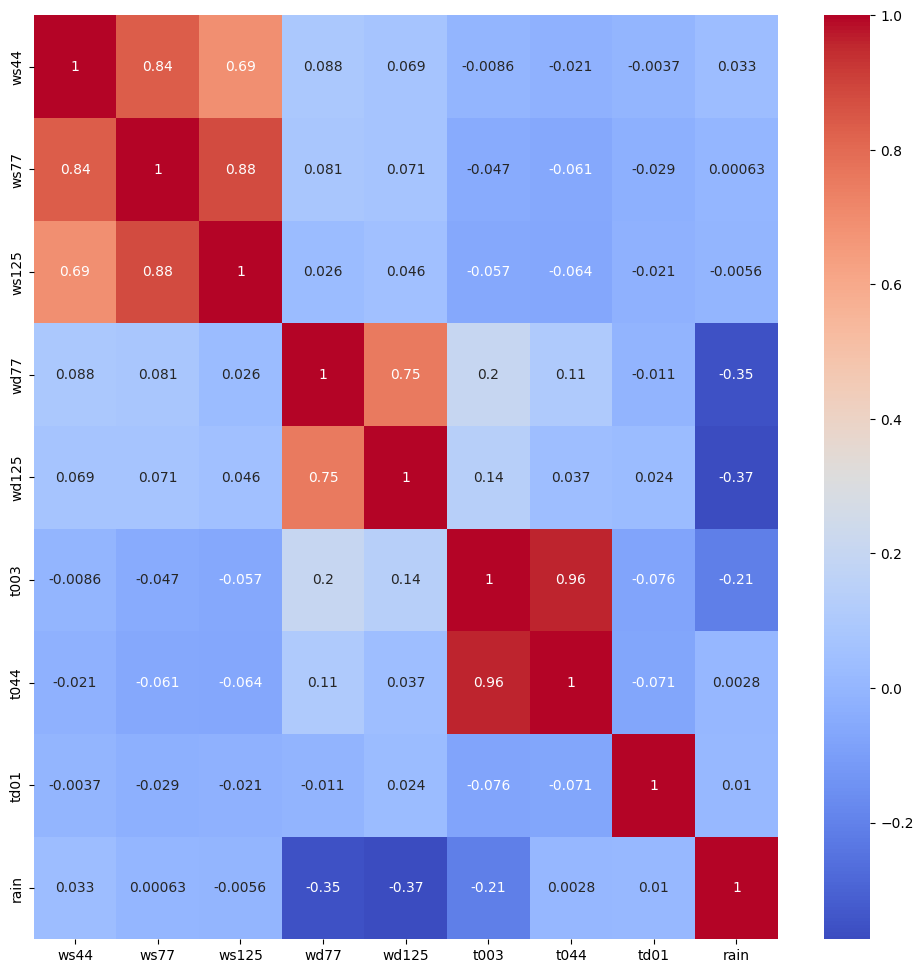

ws44     0.0
ws77     0.0
ws125    0.0
wd77     0.0
wd125    0.0
t003     0.0
t044     0.0
td01     0.0
rain     0.0
dtype: float64

In [560]:
corr_matrix = df.corr()
display(corr_matrix)

plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
display(df.isna().mean())

Create seasons

In [561]:
# df = df.reset_index()
season_map = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer' ,
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter',
    }

df['season'] = df.index.to_series().apply(lambda x: season_map[x.month])



Let's focus only on wd77 and ws77

In [562]:
drop_cols = ['ws44', 'ws125', 'wd125', 't003', 't044', 'td01', 'rain']
df = df.drop(drop_cols, axis=1)
df

,ws77,wd77,season
time,,,
1995-11-20 16:25:00,3.36,205.0,Autumn
1995-11-20 16:35:00,3.05,205.0,Autumn
1995-11-20 16:45:00,3.59,204.0,Autumn
1995-11-20 16:55:00,3.87,202.0,Autumn
1995-11-20 17:05:00,4.74,201.0,Autumn
...,...,...,...
2007-12-31 23:16:00,6.04,0.0,Winter
2007-12-31 23:26:00,6.97,0.0,Winter
2007-12-31 23:36:00,8.17,0.0,Winter


In [563]:
#fix time diff
from datetime import timedelta 
df.index = df.index - timedelta(hours=2)

df.dropna()
df= df[df['wd77'] != 0]

temp_df = pd.DataFrame()
temp_df['ws77'] = df['ws77'].resample('1H').mean().round(2)
temp_df['wd77'] = df['wd77'].resample('1H').mean().round(2)

df = temp_df

/var/folders/pg/92by_6gx0w97m7z_fq9n5_p80000gn/T/ipykernel_21955/2211461114.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp_df['ws77'] = df['ws77'].resample('1H').mean().round(2)
/var/folders/pg/92by_6gx0w97m7z_fq9n5_p80000gn/T/ipykernel_21955/2211461114.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp_df['wd77'] = df['wd77'].resample('1H').mean().round(2)


Mast data is all set. Let's work on Meso now.

In [564]:
df_meso = pd.read_csv('Data/Risoe/meso_Risoe.csv', usecols=['TIMESTAMP', 'WSP060', 'WSP080', 'WDIR060', 'WDIR080'], parse_dates=['TIMESTAMP'], index_col='TIMESTAMP')


# sort dataframe by index
df_meso.sort_index(inplace=True)

df_meso.head()

,WSP060,WSP080,WDIR060,WDIR080
TIMESTAMP,,,,
2000-01-01 07:00:00,5.40,5.83,208.02,209.09
2000-01-01 08:00:00,5.67,6.13,203.13,204.21
2000-01-01 09:00:00,6.12,6.69,203.82,204.75
2000-01-01 10:00:00,5.84,6.37,210.63,211.50
2000-01-01 11:00:00,5.56,6.20,216.27,217.37


In [565]:
print('Meso:')
display(df_meso.index[0], df_meso.index[-1])
print('Mast:')
display(df.index[0], df.index[-1])

Meso:


Timestamp('2000-01-01 07:00:00')

Timestamp('2023-06-11 06:00:00')

Mast:


Timestamp('1995-11-20 14:00:00')

Timestamp('2007-07-15 21:00:00')

As we can see overlapping period is going to be from 2000-01-01 until 2007-12-31

array([<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>,
       <Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>],
      dtype=object)

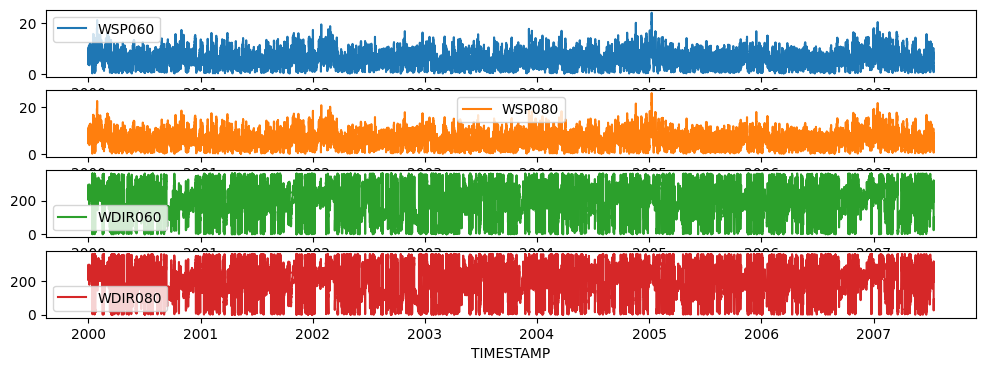

In [566]:
# slice meso_risoe to only include until the last index of resampled_scaled_mast_risoe
last_index = df.index[-1]
meso_overlap = df_meso[:str(last_index)]


# plot overlap

meso_overlap.plot(subplots=True, figsize=(12,4), sharex=False, sharey=False)

,ws77,wd77
time,,
2000-01-01 07:00:00,6.20,194.17
2000-01-01 08:00:00,6.70,202.00
2000-01-01 09:00:00,7.12,196.50
2000-01-01 10:00:00,6.54,201.00
2000-01-01 11:00:00,6.89,199.83
...,...,...
2007-07-15 17:00:00,2.64,276.33
2007-07-15 18:00:00,3.06,122.67
2007-07-15 19:00:00,3.47,24.83


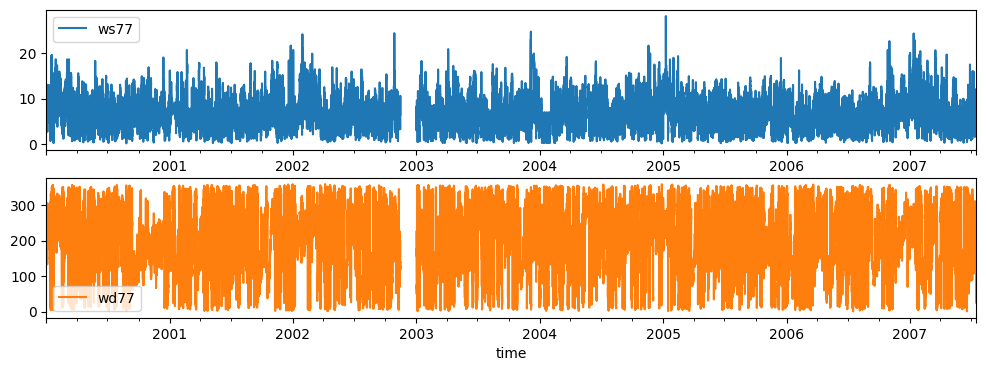

In [567]:
# slice resampled_scaled_mast_risoe to only include from the first index of meso_risoe_overlap

mast_overlap = df[df_meso.index[0]:]

# plot overlap

mast_overlap.plot(subplots=True, figsize=(12,4), sharex=False, sharey=False)
mast_overlap

Height interpolitation

/var/folders/pg/92by_6gx0w97m7z_fq9n5_p80000gn/T/ipykernel_21955/1472301820.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meso_overlap['WS077'] = (meso_overlap['WSP060'] * w_WS060) + (meso_overlap['WSP080'] * w_WS080)


array([<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>,
       <Axes: xlabel='TIMESTAMP'>], dtype=object)

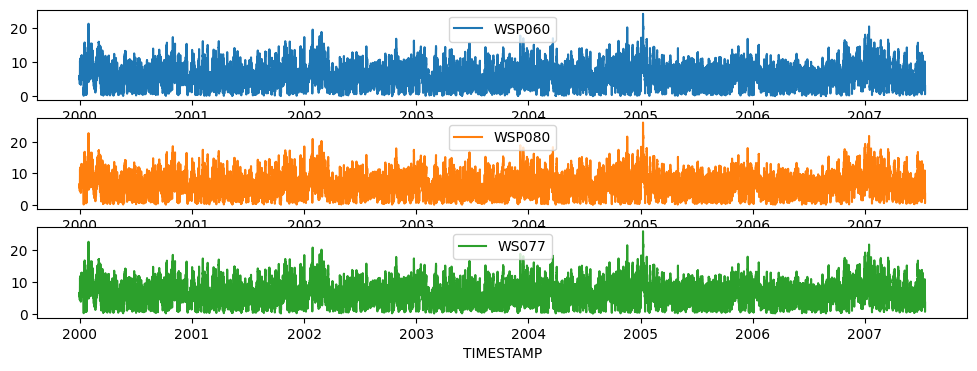

In [568]:
target_height = 77

# Calculate the interpolation weight for WS060 and WS080
w_WS060 = (80 - target_height) / (80 - 60)
w_WS080 = (target_height - 60) / (80 - 60)

# Linearly interpolate WS060 and WS080 to WS077
meso_overlap['WS077'] = (meso_overlap['WSP060'] * w_WS060) + (meso_overlap['WSP080'] * w_WS080)

# plot WS060 WS080 and WS077
meso_overlap[['WSP060', 'WSP080', 'WS077']].plot(subplots=True, figsize=(12,4), sharex=False, sharey=False)

In [569]:
def mean_wind_direction(degrees_series):
    radians_series = np.radians(degrees_series)
    unit_vectors = np.column_stack((np.cos(radians_series), np.sin(radians_series)))
    mean_vector = np.mean(unit_vectors, axis=0)
    mean_direction_degrees = np.degrees(np.arctan2(mean_vector[1], mean_vector[0]))
    return mean_direction_degrees

In [570]:
df['wd77'] = df.resample('1H').agg({'wd77':mean_wind_direction})

df.head()

/var/folders/pg/92by_6gx0w97m7z_fq9n5_p80000gn/T/ipykernel_21955/3204358364.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['wd77'] = df.resample('1H').agg({'wd77':mean_wind_direction})


,ws77,wd77
time,,
1995-11-20 14:00:00,3.47,-156.00
1995-11-20 15:00:00,5.22,-159.00
1995-11-20 16:00:00,6.29,-157.17
1995-11-20 17:00:00,7.32,-159.83
1995-11-20 18:00:00,7.94,-162.50


In [571]:
# Interpolation target height
target_height = 77

# calculate the interpolated wind direction as an angle weighted average of WDIR060 and WDIR080
# first convert the angles to radians
# then calculate the interpolation weight for WDIR060 and WDIR080
# then calculate the angle weighted average of WDIR060 and WDIR080

meso_overlap['WDIR060_rad'] = np.radians(meso_overlap['WDIR060'])
meso_overlap['WDIR080_rad'] = np.radians(meso_overlap['WDIR080'])

w_WDIR060 = (80 - target_height) / (80 - 60)
w_WDIR080 = (target_height - 60) / (80 - 60)

meso_overlap['WDIR077'] = (meso_overlap['WDIR060_rad'] * w_WDIR060) + (meso_overlap['WDIR080_rad'] * w_WDIR080)

# convret from radians to degrees

meso_overlap['WDIR077'] = np.degrees(meso_overlap['WDIR077'])

/var/folders/pg/92by_6gx0w97m7z_fq9n5_p80000gn/T/ipykernel_21955/688661091.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meso_overlap['WDIR060_rad'] = np.radians(meso_overlap['WDIR060'])
/var/folders/pg/92by_6gx0w97m7z_fq9n5_p80000gn/T/ipykernel_21955/688661091.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meso_overlap['WDIR080_rad'] = np.radians(meso_overlap['WDIR080'])
/var/folders/pg/92by_6gx0w97m7z_fq9n5_p80000gn/T/ipykernel_21955/688661091.py:15: SettingWithCopyWarning: 
A value is trying 

array([[<Axes: title={'center': 'ws77'}>,
        <Axes: title={'center': 'wd77'}>]], dtype=object)

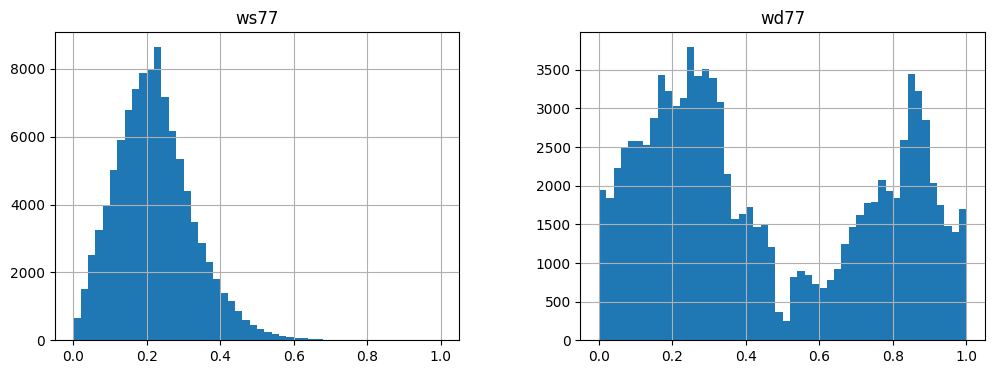

In [572]:
scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns, index=df.index)

scaled_df.hist(bins=50, figsize=(12,4))

In [573]:

joined_df = pd.concat([df, meso_overlap[['WS077', 'WDIR077']]], axis=1)

joined_df.dropna(inplace=True)

joined_df.head()

,ws77,wd77,WS077,WDIR077
2000-01-01 07:00:00,6.20,-165.83,5.7655,208.9295
2000-01-01 08:00:00,6.70,-158.00,6.0610,204.0480
2000-01-01 09:00:00,7.12,-163.50,6.6045,204.6105
2000-01-01 10:00:00,6.54,-159.00,6.2905,211.3695
2000-01-01 11:00:00,6.89,-160.17,6.1040,217.2050


In [574]:
one_hot_encoded_df = pd.get_dummies(joined_df.index.month, prefix='month')

# change index of one_hot_encoded_df to joined_df.index

one_hot_encoded_df.index = joined_df.index

# join them together

joined_month_df = pd.concat([joined_df, one_hot_encoded_df], axis=1)

joined_month_df.head()

,ws77,wd77,WS077,WDIR077,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2000-01-01 07:00:00,6.20,-165.83,5.7655,208.9295,True,False,False,False,False,False,False,False,False,False,False,False
2000-01-01 08:00:00,6.70,-158.00,6.0610,204.0480,True,False,False,False,False,False,False,False,False,False,False,False
2000-01-01 09:00:00,7.12,-163.50,6.6045,204.6105,True,False,False,False,False,False,False,False,False,False,False,False
2000-01-01 10:00:00,6.54,-159.00,6.2905,211.3695,True,False,False,False,False,False,False,False,False,False,False,False
2000-01-01 11:00:00,6.89,-160.17,6.1040,217.2050,True,False,False,False,False,False,False,False,False,False,False,False


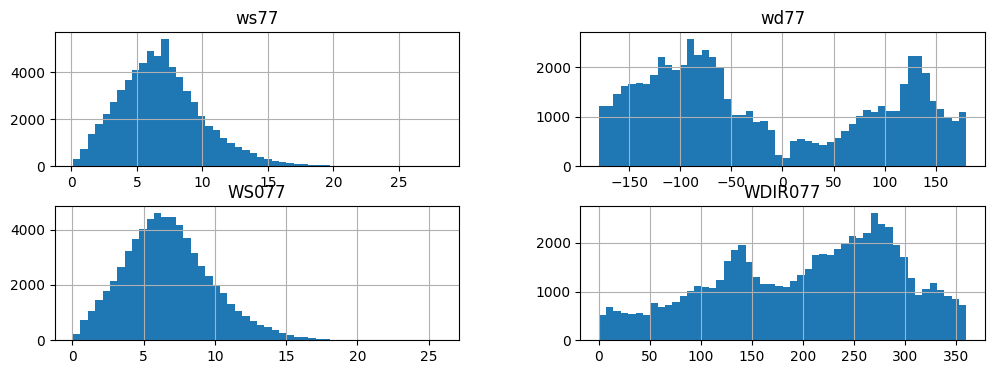

In [575]:
joined_df.hist(bins=50, figsize=(12,4))
df = joined_df

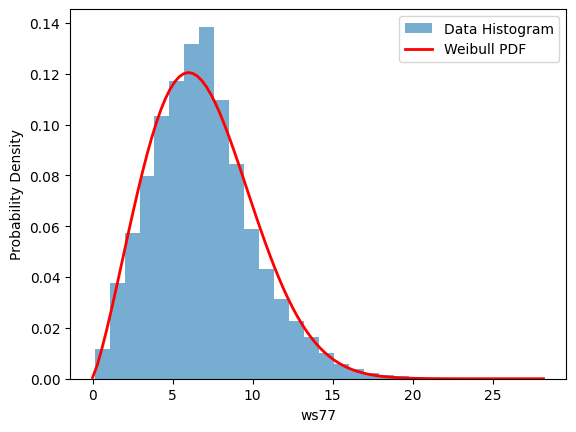

In [576]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Fit a Weibull distribution to the data
params = weibull_min.fit(joined_df['ws77'])

# Create a histogram of the data
plt.hist(joined_df['ws77'], bins=30, density=True, alpha=0.6, label='Data Histogram')

# Create a range of x values for the Weibull PDF
x = np.linspace(0, joined_df['ws77'].max(), 100)

# Calculate the Weibull PDF using the fitted parameters
pdf = weibull_min.pdf(x, *params)

# Plot the Weibull PDF on top of the histogram
plt.plot(x, pdf, 'r-', lw=2, label='Weibull PDF')

# Add labels and a legend
plt.xlabel('ws77')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

# Model development

#### Predicting wind speed

In [579]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = df[['wd77', 'ws77']]
target = df['WS077']

scaler = StandardScaler().fit(data)
data = scaler.transform(data)

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)


ols = LinearRegression()
ols.fit(X_train, y_train)

print("r^2 on train data is {}".format(ols.score(X_train, y_train)))
print("r^2 on test data is {}".format(ols.score(X_test, y_test)))


r^2 on train data is 0.7025853969396723
r^2 on test data is 0.7110132902392802


Let's see where we can get with Ridge

In [586]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train, y_train)
print("r^2 on train data is {}".format(ridge.score(X_train, y_train)))
print("r^2 on test data is {}".format(ridge.score(X_test, y_test)))

r^2 on train data is 0.7025853966352815
r^2 on test data is 0.7110131283322887


Verrry similar 

#### Let's move onto Lasso

In [589]:
lassocv = LassoCV(alphas = alphas, max_iter = 1000000)
lassocv.fit(X_train, y_train)
lassocv.alpha_

lasso = Lasso(alpha = lassocv.alpha_, max_iter = 1000000)
lasso.fit(X_train, y_train)
print("r^2 on train data is {}".format(lasso.score(X_train, y_train)))
print("r^2 on test data is {}".format(lasso.score(X_test, y_test)))

r^2 on train data is 0.7025804239201693
r^2 on test data is 0.7109743304809937
